In [451]:
# Data Libraries
import numpy as np 
import pandas as pd  

# Splits

#MODELS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# MISC
import os
from matplotlib import pyplot as plt

In [452]:
# Data
cwd=os.getcwd()
dpath=os.path.join(cwd,"./MAJORDATASET.csv")

In [453]:
df=pd.read_csv(dpath)
df = shuffle(df)

In [454]:
pd.unique(df['Fault'])

array(['Outer Race', 'Inner Race', 'Normal', 'Roller Element'],
      dtype=object)

In [455]:
df['Fault'] = df['Fault'].map({'Inner Race':0, 'Normal':1,'Outer Race':2,'Roller Element':3})
df=df.drop(df.columns[0],axis=1)
df.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
1428,0.654,-0.706,-0.001451,0.150926,0.150929,0.006866,0.878273,4.333163,-104.004918,2
1587,0.376,-0.400,-0.003689,0.086722,0.086799,-0.077486,0.164610,4.331860,-23.531477,2
38,0.557,-1.052,-0.115337,0.117592,0.164711,-0.053534,1.106944,3.381677,-1.428088,0
846,0.371,-0.366,-0.001723,0.073584,0.073602,-0.025459,0.370398,5.040625,-42.723444,1
2009,0.801,-1.113,-0.115291,0.143753,0.184271,-0.000291,2.015149,4.346853,-1.598314,3


In [456]:
df.head(20)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
1428,0.654,-0.706,-0.001451,0.150926,0.150929,0.006866,0.878273,4.333163,-104.004918,2
1587,0.376,-0.400,-0.003689,0.086722,0.086799,-0.077486,0.164610,4.331860,-23.531477,2
38,0.557,-1.052,-0.115337,0.117592,0.164711,-0.053534,1.106944,3.381677,-1.428088,0
846,0.371,-0.366,-0.001723,0.073584,0.073602,-0.025459,0.370398,5.040625,-42.723444,1
2009,0.801,-1.113,-0.115291,0.143753,0.184271,-0.000291,2.015149,4.346853,-1.598314,3
52,0.642,-0.798,-0.114168,0.116868,0.163376,0.001800,0.724326,3.929584,-1.431014,0
2109,0.835,-0.864,-0.114424,0.138179,0.179402,0.034667,1.648927,4.654346,-1.567879,3
1542,0.356,-0.393,-0.001564,0.078904,0.078917,-0.017752,0.088891,4.511050,-50.445602,2
209,0.864,-2.454,-0.115784,0.119928,0.166697,-0.664912,13.750798,5.183052,-1.439727,0
1894,1.453,-1.333,-0.114960,0.139082,0.180440,-0.031761,8.637405,8.052534,-1.569589,3


In [495]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
X.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
1428,0.654,-0.706,-0.001451,0.150926,0.150929,0.006866,0.878273,4.333163,-104.004918
1587,0.376,-0.400,-0.003689,0.086722,0.086799,-0.077486,0.164610,4.331860,-23.531477
38,0.557,-1.052,-0.115337,0.117592,0.164711,-0.053534,1.106944,3.381677,-1.428088
846,0.371,-0.366,-0.001723,0.073584,0.073602,-0.025459,0.370398,5.040625,-42.723444
2009,0.801,-1.113,-0.115291,0.143753,0.184271,-0.000291,2.015149,4.346853,-1.598314


# Data Splitting and Scaling

In [510]:
object= StandardScaler()
scale = object.fit_transform(df)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,)
X_train_scaled=object.fit_transform(X_train)
X_test_scaled=object.fit_transform(X_test)
X_test_scaled.shape

(456, 9)

# Base Model

In [543]:
in_dim=len(df.columns)-1
model = Sequential()
model.add(Dense(64, input_dim = in_dim, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history=model.fit(X_train_scaled, y_train, epochs = 250, batch_size = 20,validation_split = 0.3,verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 4ms/step - loss: 1.4188 - accuracy: 0.2910 - val_loss: 1.3248 - val_accuracy: 0.5430
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 1.3431 - accuracy: 0.3898 - val_loss: 1.2694 - val_accuracy: 0.5009
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 1.2699 - accuracy: 0.4118 - val_loss: 1.1517 - val_accuracy: 0.4753
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 1.2069 - accuracy: 0.4337 - val_loss: 1.0392 - val_accuracy: 0.5155
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.5137 - val_loss: 0.9207 - val_accuracy: 0.5539
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 1.0740 - accuracy: 0.5286 - val_loss: 0.8434 - val_accuracy: 0.6106
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.9925 - accuracy: 0.5412 - val_loss: 0.7876 - val_accuracy: 0.6746
Epoch 8/250
6

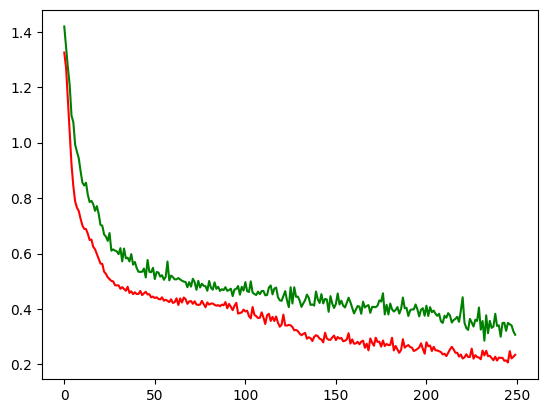

In [553]:
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='red')

# Obsering Pattern cross validation loss less than training loss
### Special Case to be solved

In [554]:
check=model.evaluate(X_test_scaled,y_test)
check[1]

15/15 [==============================] - 0s 1000us/step - loss: 0.2443 - accuracy: 0.9232


0.9232456088066101

In [555]:
dic={0:'Inner Race',
1:'Normal',
2:'Outer Race',
3:'Roller Element'}
y_test

1422    2
2155    3
1219    1
1264    2
429     0
       ..
583     1
1443    2
1678    2
618     1
2249    3
Name: Fault, Length: 456, dtype: int64

In [556]:
pred=model.predict(X_test_scaled)
actual=y_test
for i in range(100):
    maxi=0
    P=""
    A=""
    for j in range(4):
        maxi=max(maxi,pred[i][j])
    for j in range(4):
        if(maxi==pred[i][j]):
            P=dic[j]
            break
    A=dic[y_test.iloc[i]]
    if(A==P):
        print(f'matched at {i} actual value is {A} predicted value is {P}')
    else:
        print(f'Failed at {i} actual value is {A} predicted value is {P}')
    print("-----")
        

15/15 [==============================] - 0s 883us/step
matched at 0 actual value is Outer Race predicted value is Outer Race
-----
matched at 1 actual value is Roller Element predicted value is Roller Element
-----
matched at 2 actual value is Normal predicted value is Normal
-----
matched at 3 actual value is Outer Race predicted value is Outer Race
-----
matched at 4 actual value is Inner Race predicted value is Inner Race
-----
matched at 5 actual value is Outer Race predicted value is Outer Race
-----
matched at 6 actual value is Inner Race predicted value is Inner Race
-----
matched at 7 actual value is Normal predicted value is Normal
-----
matched at 8 actual value is Inner Race predicted value is Inner Race
-----
matched at 9 actual value is Outer Race predicted value is Outer Race
-----
matched at 10 actual value is Normal predicted value is Normal
-----
matched at 11 actual value is Inner Race predicted value is Inner Race
-----
matched at 12 actual value is Inner Race predic

In [560]:
print(f'Accuracy of Model is {100*check[1]} at test Data')

Accuracy of Model is 92.32456088066101 at test Data
